In [ ]:
# The following program can be found at this web address:
# http://timotheepoisot.fr/2012/05/18/networkx-metapopulations-python/ 

In [67]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [150]:
Patches = 100   # Number of patches (hospitals)
P_ext = 0.01    # Probability of extinction (e)
P_col = 0.001   # Probability of colonization (c)
P_init = 0.02   # Probability that a patch will be occupied at the beginning
Distance = 3.0  # An arbitrary parameter to determine which patches are connected
Edges = 0.25

In [151]:
class patch:
    def __init__(self,status=0,pos=(0,0)):
        self.status = status
        self.pos = pos
    def __str__(self):
        return(str(self.status))

In [152]:
G = nx.Graph(directed=True)

In [153]:
for i in range(Patches):
    Stat = 1 if np.random.uniform() < P_init else 0
    Pos  = (np.random.uniform()*10-5,np.random.uniform()*10-5)
    G.add_node(patch(Stat,Pos))

In [154]:
for p1 in G.nodes():
    for p2 in G.nodes():
        Dist = np.sqrt((p1.pos[1]-p2.pos[1])**2+(p1.pos[0]-p2.pos[0])**2)
        if Dist <= Distance:
            G.add_edge(p1,p2)

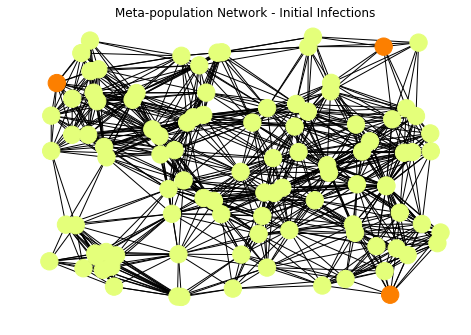

In [155]:
occup = [n.status for n in G]
pos = {}
for n in G.nodes():
    pos[n] = n.pos
nx.draw(G,node_color=occup,with_labels=False,cmap=plt.cm.Wistia,pos=pos,vmin=0,vmax=1)
plt.title('Meta-population Network - Initial Infections')
plt.show()

In [156]:
# Start the simulation
for n in G.nodes():
    if (n.status == 1 and np.random.uniform() < P_ext):
        n.status = 0

In [157]:
for n in G.nodes():
    if n.status == 1:
        neighb = G[n] # That's it, a list of the neighbors
        for nei in neighb:
            if nei.status == 0:
                if np.random.uniform() < P_col:
                    nei.status = 1
                    break

In [158]:
Time = [0]
Occupancy = [np.sum([n.status for n in G])/float(Patches)]
for timestep in range(500):
    # Check for extinctions
    for n in G.nodes():
        if (n.status == 1 and np.random.uniform() < P_ext):
            n.status = 0
    # Check for invasions
    for n in G.nodes():
        if n.status == 1:
            neighb = G[n] # That's it, a list of the neighbors
            for nei in neighb:
                if nei.status == 0:
                    if np.random.uniform() < P_col:
                        nei.status = 1
                        break
    Time.append(timestep+1)
    Occupancy.append(np.sum([n.status for n in G])/float(Patches))                   

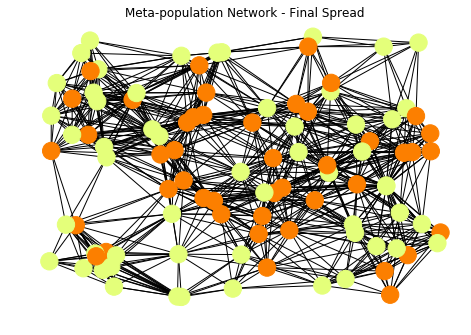

In [159]:
nx.draw(G,node_color=[n.status for n in G],with_labels=False,cmap=plt.cm.Wistia,pos=pos,vmin=0,vmax=1)
plt.title('Meta-population Network - Final Spread')
plt.show()

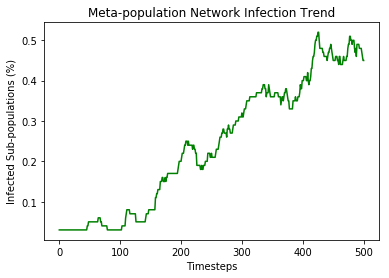

In [160]:
plt.plot(Time,Occupancy,'g-')
plt.title('Meta-population Network Infection Trend')
plt.xlabel('Timesteps')
plt.ylabel('Infected Sub-populations (%)')
plt.show()

In [62]:
Occupancy

[0.38,
 0.38,
 0.37,
 0.37,
 0.38,
 0.38,
 0.38,
 0.4,
 0.4,
 0.4,
 0.41,
 0.41,
 0.41,
 0.41,
 0.4,
 0.41,
 0.4,
 0.39,
 0.4,
 0.4,
 0.39,
 0.39,
 0.38,
 0.37,
 0.37,
 0.37,
 0.37,
 0.37,
 0.36,
 0.36,
 0.36,
 0.37,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.4,
 0.39,
 0.4,
 0.43,
 0.44,
 0.45,
 0.44,
 0.44,
 0.44,
 0.44,
 0.45,
 0.45,
 0.44,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.47,
 0.47,
 0.45,
 0.44,
 0.44,
 0.46,
 0.46,
 0.47,
 0.47,
 0.47,
 0.47,
 0.46,
 0.45,
 0.45,
 0.44,
 0.44,
 0.44,
 0.44,
 0.47,
 0.47,
 0.48,
 0.47,
 0.47,
 0.46,
 0.45,
 0.45,
 0.45,
 0.45,
 0.46,
 0.46,
 0.47,
 0.5,
 0.49,
 0.5,
 0.51,
 0.5,
 0.51,
 0.5,
 0.49,
 0.5,
 0.5,
 0.51,
 0.52,
 0.52,
 0.53,
 0.53,
 0.53,
 0.54,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.55,
 0.55,
 0.57,
 0.58,
 0.58,
 0.58,
 0.58,
 0.58,
 0.58,
 0.58,
 0.58,
 0.58,
 0.59,
 0.57,
 0.55,
 0.56,
 0.56,
 0.56,
 0.55,
 0.53,
 0.53,
 0.54,
 0.54,
 0.54,
 0.55,
 0.56,
 0.58,
 0.57,
 0.54,
 0.54,
 0.54,
 0.52,
 0.52,
 0.52,
 0.51,
 0.51,
 0.51,
 